In [6]:
np.logspace(0, 3, 50)

array([    1.        ,     1.1513954 ,     1.32571137,     1.52641797,
           1.75751062,     2.02358965,     2.32995181,     2.6826958 ,
           3.0888436 ,     3.55648031,     4.09491506,     4.71486636,
           5.42867544,     6.25055193,     7.19685673,     8.28642773,
           9.54095476,    10.98541142,    12.64855217,    14.56348478,
          16.76832937,    19.30697729,    22.22996483,    25.59547923,
          29.47051703,    33.93221772,    39.06939937,    44.98432669,
          51.79474679,    59.63623317,    68.6648845 ,    79.06043211,
          91.0298178 ,   104.81131342,   120.67926406,   138.94954944,
         159.98587196,   184.20699693,   212.09508879,   244.20530945,
         281.1768698 ,   323.74575428,   372.75937203,   429.19342601,
         494.17133613,   568.9866029 ,   655.12855686,   754.31200634,
         868.51137375,  1000.        ])

In [15]:
import numpy as np
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0] / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x,bin_means_y

In [20]:
import collections
data = (np.random.random(10000)*10)**3
ba_c2 = dict(collections.Counter(data))
print(list(ba_c2.keys))

ba_x,ba_y = log_binning(ba_c2,50)

plt.xscale('log')
plt.yscale('log')
plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
plt.xlim((1e-4,1e-1))
plt.ylim((.9,1e4))
plt.xlabel('Connections (normalized)')
plt.ylabel('Frequency')
plt.show()

TypeError: 'builtin_function_or_method' object is not iterable

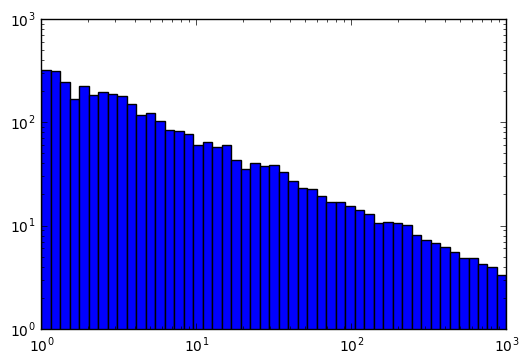

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# something random to plot
data = (np.random.random(10000)*10)**3

# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

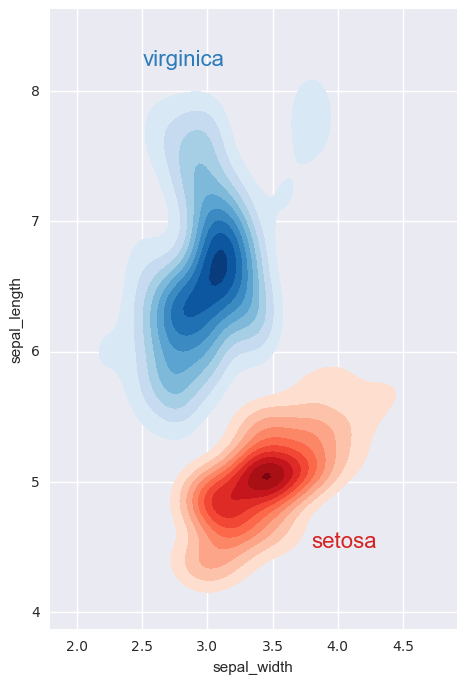

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

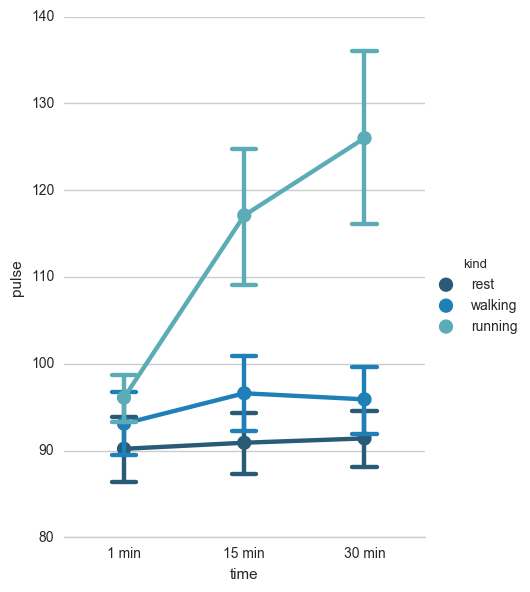

In [4]:

import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=df,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

In [3]:
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest
